<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Session_4_SVM_%26_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

#Session-4.1: Support Vector Machine (SVM)


###Objective: 
 1. *Apply SVM algorithm for image classification .*

 



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

##Handwritten Character Dataset

In [ ]:
# Download the train data
!wget -O mnist_train.csv https://www.dropbox.com/s/yrqwhkqj8914h9l/mnist_train.csv?dl=0

In [ ]:
# Download the test data
!wget -O mnist_test.csv https://www.dropbox.com/s/3c02b49hcze40i6/mnist_test.csv?dl=0

In [ ]:
"""importing the dataset """

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# print first five row
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop the first column 
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0:1]
train_labels

#train_images

In [ ]:
# count the labels distribution
train_labels.value_counts()

label
1        6742
7        6265
3        6131
2        5958
9        5949
0        5923
6        5918
8        5851
4        5842
5        5421
dtype: int64

In [ ]:
# drop the first column 
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0:1]
test_labels

#test_images

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print("Training Set: ",train_images.shape)
print("Test Set: ", test_images.shape)

Training Set:  (60000, 784)
Test Set:  (10000, 784)


##Small portion of the Dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(test_images,test_labels,test_size = 0.25,random_state = 0)
print("Training Set: ",X_train.shape)
print("Test Set: ", X_test.shape)

Training Set:  (7500, 784)
Test Set:  (2500, 784)


In [ ]:
class_names = np.unique(train_labels).tolist()

## Plotting some digits

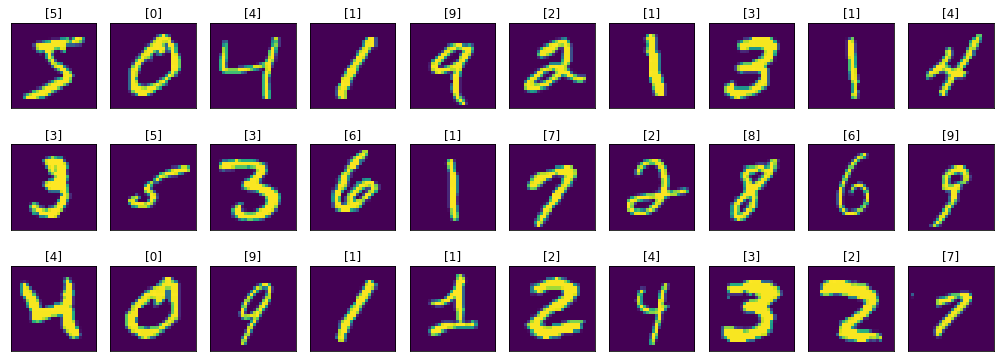

In [ ]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_images.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{train_labels.iloc[digit_num].values}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

##Normalizing

In [ ]:
# Normalizing data .. Normilization was found better in this dataset than Standardization
# Normilization between (0, 1) was tested vs (-1, 1) and (-1, 1) showed better results

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

#Support Vector Machine (SVM)

In [ ]:
# Trainging the SVC model with gamma and C found in previous step
# gamma=0.00728932024638, C=2.82842712475

classifier = svm.SVC()
classifier.fit(normalized_X_train, y_train)

# Calculating the training accuracy (to measure the bias)
train_accuracy = classifier.score(normalized_X_train, y_train)
print (f"Training Accuracy: {train_accuracy*100:.3f}%")



In [ ]:
# Getting predictions 
predictions = classifier.predict(normalized_X_test)

In [ ]:
# Making confusing matrix (actual,prediction)

confusion_matrix(y_test,predictions)

array([[258,   0,   2,   1,   0,   0,   1,   0,   0,   0],
       [  0, 294,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 238,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   1, 260,   0,   5,   0,   1,   1,   1],
       [  1,   1,   1,   0, 255,   0,   3,   0,   1,   5],
       [  3,   0,   0,   2,   0, 201,   1,   0,   1,   0],
       [  1,   0,   1,   0,   0,   1, 229,   0,   1,   0],
       [  0,   3,   5,   0,   1,   0,   0, 215,   1,   6],
       [  0,   0,   3,   3,   2,   2,   0,   2, 236,   1],
       [  3,   2,   0,   2,   4,   0,   1,   2,   0, 231]])

In [ ]:
# it is used to check the accuracy of the classification
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       262
           1       0.98      0.99      0.99       296
           2       0.94      0.99      0.97       240
           3       0.97      0.97      0.97       269
           4       0.97      0.96      0.96       267
           5       0.96      0.97      0.96       208
           6       0.97      0.98      0.98       233
           7       0.97      0.93      0.95       231
           8       0.98      0.95      0.96       249
           9       0.95      0.94      0.94       245

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



##Predictions

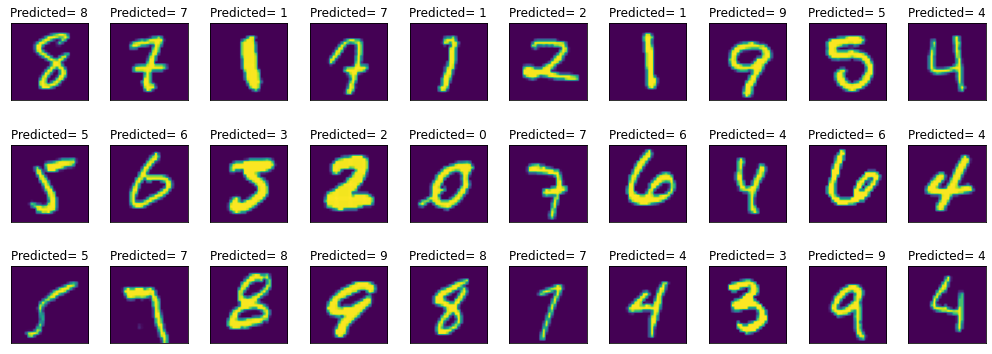

In [ ]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_test.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted= {predictions[digit_num]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## Misclassified Samples

In [ ]:
# add the predicted result into the y_test column 

y_test['predicted'] = predictions
y_test


In [ ]:
index = y_test.index.tolist()

# find the mis classified image indexes

mis_clas = list()

for i in index:
  if y_test['label'][i] != y_test['predicted'][i]:
    mis_clas.append(i)
mis_clas    

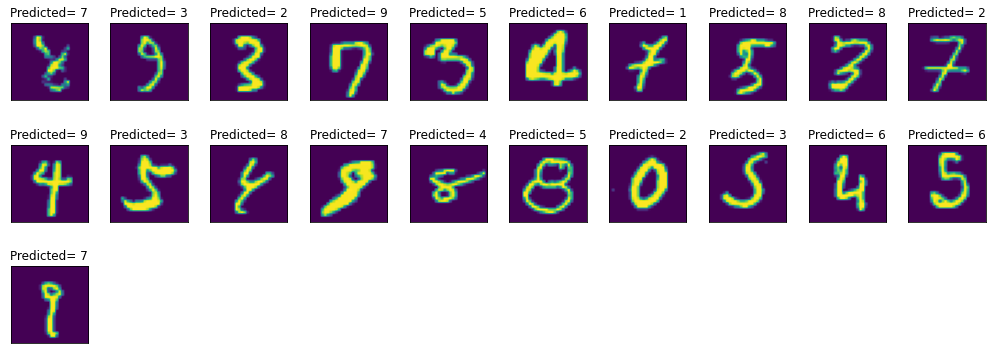

In [ ]:
# Plotting some misclassified digits
plt.figure(figsize=(14,12))
for i,img in enumerate(mis_clas[0:21]):
    plt.subplot(7,10,i+1)
    grid_data = X_test.loc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted= {y_test['predicted'].loc[img]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()


#Session-4.2: Multi Layer Perceptron (MLP)


###Objective: 
 1. *Introduce with Tensorflow.*
 2. *Construct MLP architecture for computer vision application.*
 3. *Get familiar with Early stopping and Checkpoint method.*

 



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler

# Deep learning Librarires

# import tensorflow as tf
# import keras as keras
# from keras.models import Model
# from keras.layers import  Input, Dense, Activation, Dropout
# from tensorflow.keras.optimizers import Adam,SGD,Nadam

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
print(tf.__version__)

2.8.2


##Handwritten Character Dataset

In [ ]:
# Download the train data
!wget -O mnist_train.csv https://www.dropbox.com/s/yrqwhkqj8914h9l/mnist_train.csv?dl=0

In [ ]:
# Download the test data
!wget -O mnist_test.csv https://www.dropbox.com/s/3c02b49hcze40i6/mnist_test.csv?dl=0

In [ ]:
"""importing the dataset """

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# print first five row
train_data.head()

In [ ]:
# drop the first column 
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0:1]
train_labels

#train_images

In [ ]:
# count the labels distribution
train_labels.value_counts()

In [ ]:
# drop the first column 
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0:1]
test_labels

#test_images

In [ ]:
print("Training Set: ",train_images.shape)
print("Test Set: ", test_images.shape)

Training Set:  (60000, 784)
Test Set:  (10000, 784)


## Plotting some digits

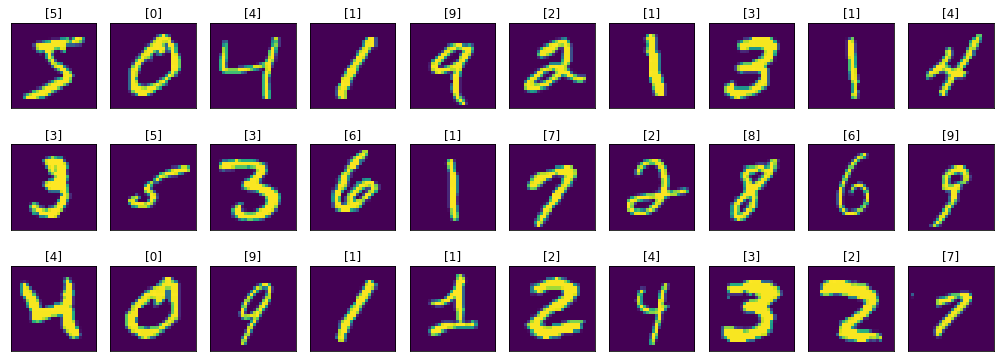

In [ ]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_images.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{train_labels.iloc[digit_num].values}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

##Single Layer Neural Network

In [ ]:
# Functional API

# A single layer neural network

input_img = Input(shape=(784,))
dense = Dense(14, activation="relu")(input_img)
output = Dense(10,activation = "softmax")(dense)
model = Model(inputs=input_img, outputs=output, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 14)                10990     
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
Total params: 11,140
Trainable params: 11,140
Non-trainable params: 0
_________________________________________________________________


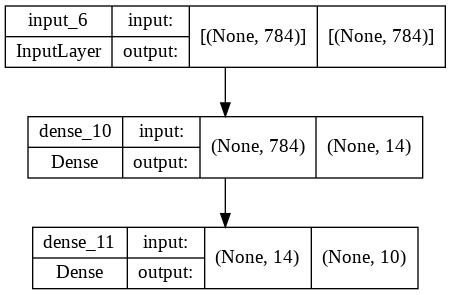

In [ ]:
# You can also plot the model as a graph:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
keras.backend.clear_session()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


748/750 [============================>.] - ETA: 0s - loss: 1.1284 - accuracy: 0.6343

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


750/750 [==============================] - 3s 4ms/step - loss: 1.1276 - accuracy: 0.6345 - val_loss: 0.9915 - val_accuracy: 0.6700
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.9921 - accuracy: 0.6805 - val_loss: 0.8878 - val_accuracy: 0.7155
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.8843 - accuracy: 0.7272 - val_loss: 0.8836 - val_accuracy: 0.7136
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.8446 - accuracy: 0.7504 - val_loss: 0.7968 - val_accuracy: 0.7664
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7815 - accuracy: 0.7823 - val_loss: 0.8298 - val_accuracy: 0.7988
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7066 - accuracy: 0.8080 - val_loss: 0.7346 - val_accuracy: 0.8459
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6354 - accuracy: 0.8366 - val_loss: 0.6104 - val_accuracy: 0.8466
Epoch 8/10
750/75

In [ ]:

test_scores = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.6652 - accuracy: 0.8535 - 883ms/epoch - 3ms/step
Test loss: 0.6652413606643677
Test accuracy: 0.8535000085830688


# Use CallBacks

In [ ]:
# stop training if ==0.95

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if (logs.get('accuracy')>0.95):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

      
callbacks = myCallback() 

In [ ]:
keras.backend.clear_session()

# compile the mode
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=["accuracy"],
)

#train the model

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2, callbacks = [callbacks])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


736/750 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.8656

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


750/750 [==============================] - 2s 3ms/step - loss: 0.5327 - accuracy: 0.8657 - val_loss: 0.5683 - val_accuracy: 0.8623
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5105 - accuracy: 0.8706 - val_loss: 0.6797 - val_accuracy: 0.8799
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4893 - accuracy: 0.8737 - val_loss: 0.6738 - val_accuracy: 0.8715
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4905 - accuracy: 0.8744 - val_loss: 0.5446 - val_accuracy: 0.8738
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4874 - accuracy: 0.8779 - val_loss: 0.5168 - val_accuracy: 0.8788
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4753 - accuracy: 0.8816 - val_loss: 0.5050 - val_accuracy: 0.8833
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4647 - accuracy: 0.8823 - val_loss: 0.5331 - val_accuracy: 0.8670
Epoch 8/10
750/75

### Plot Accuracy and Loss

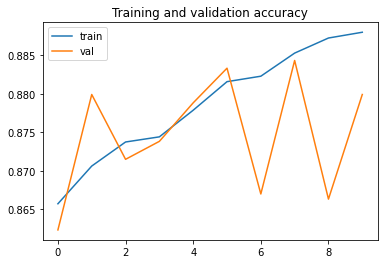

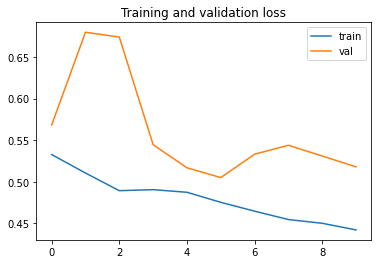

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )

plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend(['train', 'val'])

## Use Callbacks with Checkpoint

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.90

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2, callbacks = [callback_list])


Epoch 1/10
747/750 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8961
Epoch 1: val_accuracy improved from -inf to 0.88492, saving model to mymodel.h5
750/750 [==============================] - 4s 5ms/step - loss: 0.4198 - accuracy: 0.8961 - val_loss: 0.5364 - val_accuracy: 0.8849
Epoch 2/10
732/750 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8958
Epoch 2: val_accuracy improved from 0.88492 to 0.89667, saving model to mymodel.h5
750/750 [==============================] - 2s 2ms/step - loss: 0.4102 - accuracy: 0.8955 - val_loss: 0.5195 - val_accuracy: 0.8967
Epoch 3/10
744/750 [============================>.] - ETA: 0s - loss: 0.4123 - accuracy: 0.8972
Epoch 3: val_accuracy did not improve from 0.89667
750/750 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8970 - val_loss: 0.5203 - val_accuracy: 0.8878
Epoch 4/10
750/750 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.8961
Epoch 4: 

In [ ]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       980
           1       0.98      0.94      0.96      1135
           2       0.84      0.90      0.87      1032
           3       0.88      0.78      0.82      1010
           4       0.93      0.89      0.91       982
           5       0.90      0.81      0.85       892
           6       0.89      0.94      0.92       958
           7       0.95      0.90      0.92      1028
           8       0.85      0.89      0.87       974
           9       0.88      0.92      0.90      1009

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



##Task

1. Design A Multilayer Neural Network for digit classification.

2. Try to tune the Hyperparameters (i.e., no. of nodes, layers, optimizer, batch size) to improve the performance.


# Bangla Handwritten Character Dataset



**Ekush: A Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features:**

 - Characters Recognition
 - Recognition in context
 - Gender Identification
 - Forensic Investigation
 - 673,482‬ character instances
 - 242 character class
 - 4 captions per image
 - 340,243‬ Female data
 - 333,239‬ Male data

In [ ]:
# run the cell to download the data
!wget -O ekush.zip https://www.dropbox.com/s/sym70dkootl09va/ekushCSV.zip?dl=0


In [ ]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("ekush.zip", 'r')
zip_ref.extractall("bangla-digit")
zip_ref.close()